In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [15]:
df_train = pd.read_csv('../dataset/train.csv', delimiter=";")
df_test = pd.read_csv('../dataset/test.csv', delimiter=";")

df_test.head(10)

,protocol,pkt_length,pkt_rate,pkt_count,ip_ttl,status
0,ICMP,73,1000,59078,64,DDOS-Attack
1,ICMP,83,1000,59151,64,DDOS-Attack
2,UDP,901,140,8515,32,Normal
3,ICMP,74,2713,163581,64,DDOS-Attack
4,UDP,76,10333,623891,64,DDOS-Attack
5,UDP,76,1775,104100,64,DDOS-Attack
6,UDP,80,2088,126455,64,DDOS-Attack
7,UDP,527,52,3221,128,Normal
8,UDP,908,97,5929,128,Normal
9,UDP,77,500,25666,64,DDOS-Attack


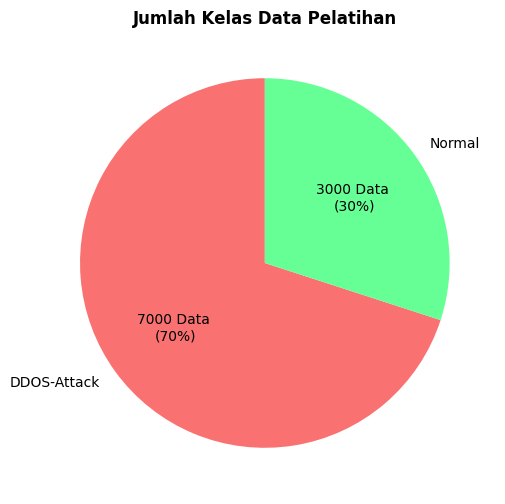

In [3]:
label_counts = df_train['status'].value_counts()
labels = label_counts.index
sizes = label_counts.values

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{int(round(pct/100.*sum(sizes)))} Data \n({pct:.0f}%)",
    startangle=90,
    colors=["#fa7171", "#66ff96"]
)

plt.title("Jumlah Kelas Data Pelatihan", fontsize=12, fontweight="bold")
plt.show()


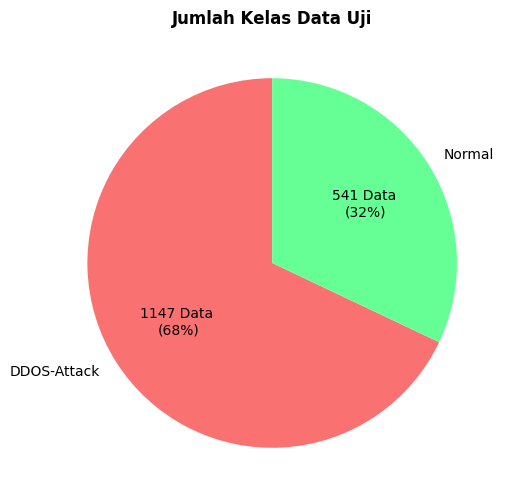

In [4]:
label_counts = df_test['status'].value_counts()
labels = label_counts.index
sizes = label_counts.values

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{int(round(pct/100.*sum(sizes)))} Data \n({pct:.0f}%)",
    startangle=90,
    colors=["#fa7171", "#66ff96"]
)

plt.title("Jumlah Kelas Data Uji", fontsize=12, fontweight="bold")
plt.show()


In [5]:
label_encoder = LabelEncoder()
df_train['status'] = label_encoder.fit_transform(df_train['status'])

protocol_encoder = LabelEncoder()
df_train['protocol'] = protocol_encoder.fit_transform(df_train['protocol'])

df_train['protocol']

0       0
1       2
2       2
3       0
4       2
       ..
9995    2
9996    2
9997    0
9998    2
9999    1
Name: protocol, Length: 10000, dtype: int64

In [6]:
protocol_mapping = {'ICMP': 0, 'TCP': 1, 'UDP': 2}
df_test['protocol'] = df_test['protocol'].map(protocol_mapping)

status_mapping = {'DDOS-Attack': 0, 'Normal': 1}
df_test['status'] = df_test['status'].map(status_mapping)

df_test['protocol']

0       0
1       0
2       2
3       0
4       2
       ..
1683    2
1684    2
1685    2
1686    2
1687    1
Name: protocol, Length: 1688, dtype: int64

In [7]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [9]:
y_pred = model.predict(X_test)

In [10]:
def format_metric(value):
    if value in [0, 1]:
        return f"{value:.0f} (Presentase: {value*100:.0f}%)"
    else:
        return f"{value:.4f} (Presentase: {value*100:.2f}%)"

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  = {format_metric(accuracy)}")
print(f"Precision = {format_metric(precision)}")
print(f"Recall    = {format_metric(recall)}")
print(f"F1-Score  = {format_metric(f1)}")

Accuracy  = 1 (Presentase: 100%)
Precision = 1 (Presentase: 100%)
Recall    = 1 (Presentase: 100%)
F1-Score  = 1 (Presentase: 100%)


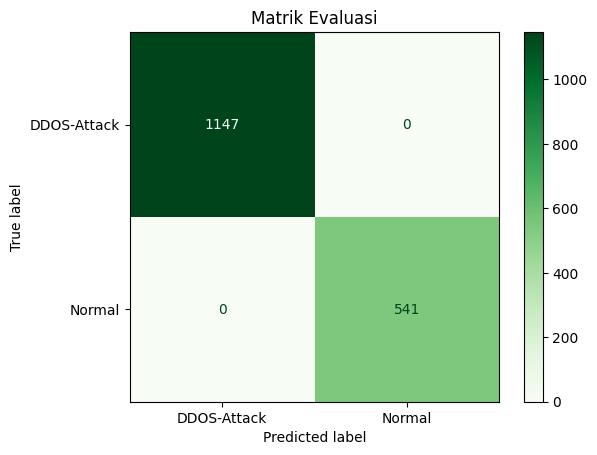

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=label_encoder.classes_)
disp.plot(cmap='Greens')
plt.title("Matrik Evaluasi")
plt.show()

In [12]:
joblib.dump(model, 'result/ddos_model.pkl')
joblib.dump(label_encoder, 'result/label_encoder.pkl')

print("\nModel dan preprocessor disimpan!")


Model dan preprocessor disimpan!
